### 002925 盈趣科技
##### 加权平均净资产收益率

| 2019 | 2018 | 2017 |
| ---- | ---- | ---- |
| 25.43% | 24.72% | 80.97% |

##### 2020-11-02
* 最初模版

In [12]:
ticker = '002925'

In [13]:
%%html
<style>
table {float:left}
</style>

In [14]:
%load_ext autoreload
%autoreload 2

import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import baostock

sys.path.append(os.path.join(os.path.expanduser('~'), 'GitHub', 'stock'))
import script.data as data
import script.utils as utils
import script.bsutil as bu
from script.figure import draw

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
baostock.login()
code = bu.get_bs_code(ticker)
income = data.get_IS(ticker)
incomeq = data.get_ISQ(ticker)
mkt = bu.get_price_daily(code)
bs = data.get_BS(ticker)
baostock.logout()

login success!
logout success!


In [16]:
change = utils.column_pct(income[['营业总收入', '营业总成本', '归属于母公司所有者的净利润']], periods=-1)
income_change = pd.concat([income[['截止日期', '基本每股收益', '稀释每股收益']], change], axis=1)
income_change.set_index('截止日期')

,基本每股收益,稀释每股收益,营业总收入,营业总成本,归属于母公司所有者的净利润
截止日期,,,,,
2019-12-31,2.13,2.13,"3,854,442,533 ( 38.7%)","2,799,178,927 ( 45.2%)","973,168,767 ( 19.6%)"
2018-12-31,1.81,1.81,"2,778,729,499 (-15.0%)","1,928,055,548 (-10.0%)","813,674,899 (-17.3%)"
2017-12-31,2.59,2.59,"3,267,195,749 ( 98.2%)","2,141,423,511 ( 87.5%)","983,862,491 (120.9%)"
2016-12-31,1.17,1.17,"1,648,411,412 ( 68.1%)","1,142,377,711 ( 43.0%)","445,475,709 (170.3%)"
2015-12-31,0.43,0.43,"980,448,440 ( 53.0%)","798,745,961 ( 55.3%)","164,787,696 ( 39.7%)"
2014-12-31,0.31,0.31,"640,948,548 ( nan%)","514,270,389 ( nan%)","117,973,921 ( nan%)"


In [17]:
change = utils.column_pct(incomeq[['营业收入', '归属于母公司所有者的净利润']], periods=-4)
incomeq_change = pd.concat([incomeq[['截止日期']], change], axis=1)
incomeq_change[:24].set_index('截止日期')

,营业收入,归属于母公司所有者的净利润
截止日期,,
2020-09-30,"1,647,856,007 ( 69.5%)","300,380,849 ( 29.2%)"
2020-06-30,"966,182,613 ( 3.2%)","219,500,611 (-16.7%)"
2020-03-31,"739,045,818 ( 6.6%)","167,959,281 ( 9.0%)"
2019-12-31,"1,252,869,298 ( 64.3%)","323,238,779 ( 55.4%)"
2019-09-30,"971,962,544 ( 37.0%)","232,473,011 ( 11.6%)"
2019-06-30,"936,542,361 ( 45.8%)","263,431,648 ( 16.2%)"
2019-03-31,"693,068,330 ( 4.3%)","154,025,329 ( -9.7%)"
2018-12-31,"762,351,375 (-20.2%)","208,043,385 (-12.6%)"
2018-09-30,"709,636,028 (-28.9%)","208,343,243 (-31.8%)"


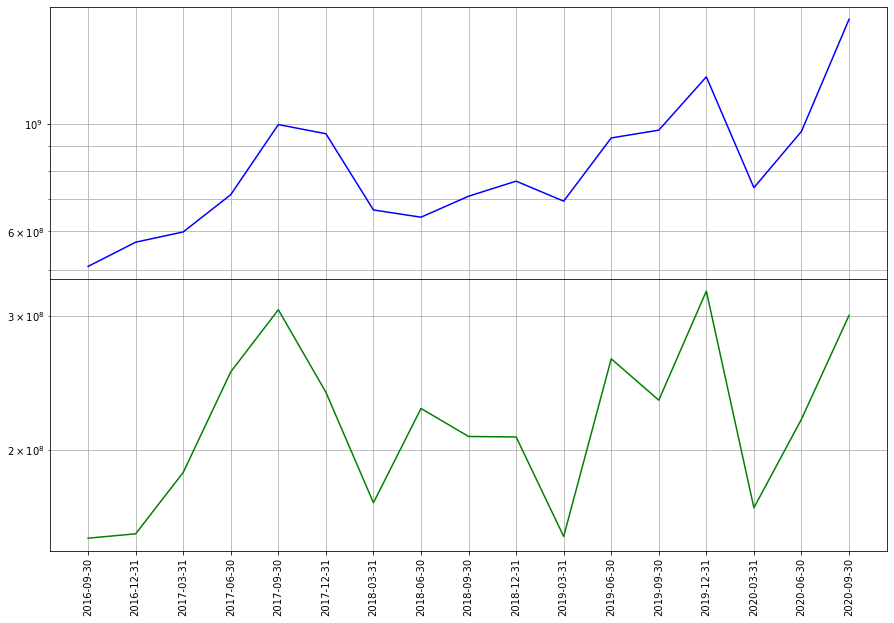

In [18]:
plt.figure(figsize=(15,10))
ax = plt.subplot(211)
plt.plot(incomeq['截止日期'][::-1], incomeq['营业收入'][::-1], 'b-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
ax = plt.subplot(212)
plt.plot(incomeq['截止日期'][::-1], incomeq['归属于母公司所有者的净利润'][::-1], 'g-')
ax.set_yscale("log")
ax.grid(True, which='both', axis='both')
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=.0)
plt.show()

In [19]:
income['毛利率'] = (1 - income['营业成本'] / income['营业收入']).round(3) * 100
income['净利率'] = (income['净利润'] / income['营业总收入']).round(3) * 100
income.set_index('截止日期')[['毛利率', '净利率']]

,毛利率,净利率
截止日期,,
2019-12-31,39.8,25.4
2018-12-31,43.0,29.2
2017-12-31,48.9,30.1
2016-12-31,42.1,27.0
2015-12-31,33.3,16.8
2014-12-31,31.6,18.4


In [20]:
change = utils.column_pct(bs[['存货', '应付账款', '应收账款']], periods=-1)
bs_change = pd.concat([bs[['截止日期']], change], axis=1)
bs_change.set_index('截止日期', inplace=True)
change = utils.column_pct(income[['营业收入']], periods=-1)
income_change = pd.concat([income[['截止日期']], change], axis=1)
income_change.set_index('截止日期', inplace=True)
pd.concat([income_change, bs_change], axis=1)

,营业收入,存货,应付账款,应收账款
截止日期,,,,
2019-12-31,"3,854,442,533 ( 38.7%)","467,956,042 ( 40.4%)","689,733,554 ( 22.4%)","1,223,592,720 ( 68.8%)"
2018-12-31,"2,778,729,499 (-15.0%)","333,334,385 ( 6.8%)","563,328,681 ( -9.7%)","724,704,530 (-11.6%)"
2017-12-31,"3,267,195,749 ( 98.2%)","312,157,354 ( 33.9%)","623,523,755 (122.4%)","819,601,348 ( 84.5%)"
2016-12-31,"1,648,411,412 ( 68.1%)","233,175,620 (113.0%)","280,378,056 ( 96.2%)","444,156,207 (101.1%)"
2015-12-31,"980,448,440 ( 53.0%)","109,489,225 ( 37.2%)","142,878,187 ( -3.9%)","220,845,379 ( 29.6%)"
2014-12-31,"640,948,548 ( nan%)","79,815,159 ( nan%)","148,653,857 ( nan%)","170,388,430 ( nan%)"


In [21]:
mkt['前复权'] = mkt['close'].round(2)
mkt['滚动市盈率'] = mkt['peTTM'].round(1)
mkt['交易日期'] = pd.to_datetime(mkt['date'])
df = mkt[['前复权', '滚动市盈率']].groupby(mkt['交易日期'].dt.year).agg(['min', 'max', 'first', 'last'])[-10:]
df['前复权增长'] = df['前复权'][['first', 'last']].apply(lambda x: round((x[1]-x[0])/x[0] * 100,1), axis=1)
df.drop(columns=[('前复权', 'min'), ('前复权', 'max'), ('滚动市盈率', 'first'), ('滚动市盈率', 'last')])


前复权        滚动市盈率       前复权增长
      first   last   min   max      
交易日期                                
2018  30.73  42.09  15.5  49.3  37.0
2019  41.16  43.09  19.4  34.2   4.7
2020  44.56  59.84  20.7  37.7  34.3

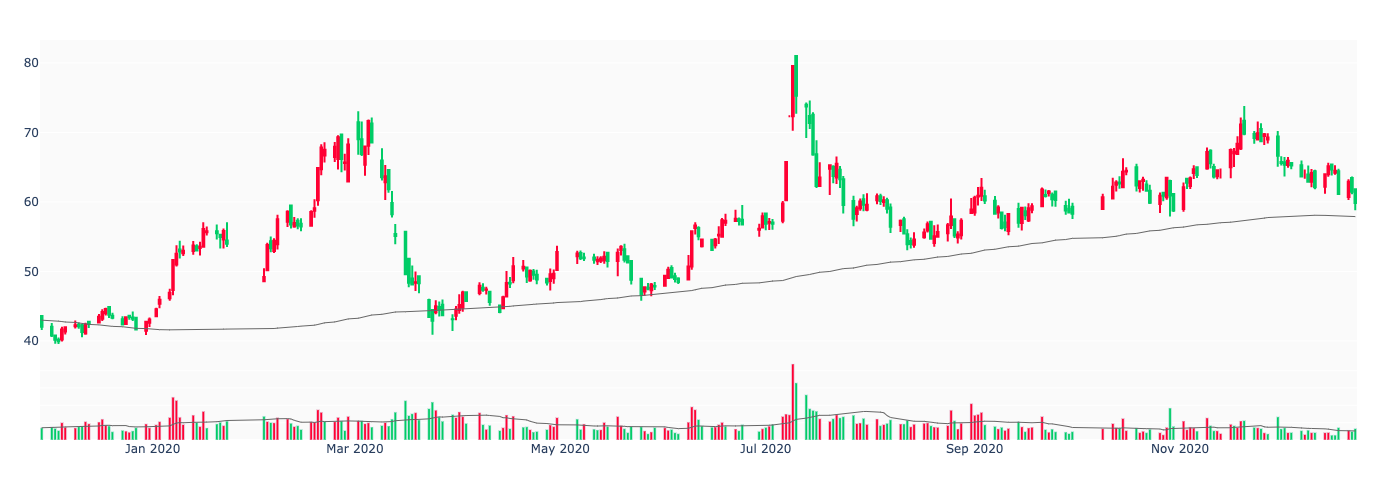

In [22]:
draw(mkt, 260, 200, 20)